<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

In [2]:

##### Your Code Here #####
job_listing = ('./data/job_listings.csv')
jobs = pd.read_csv(job_listing)
text = jobs['description']



In [3]:
#How to extract individual text from description column
soup = BeautifulSoup(text[0])
example = soup.get_text(" ")
example

'b" Job Requirements: \\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them \\n Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role) \\n Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R \\n Ability to communicate Model findings to both Technical and Non-Technical stake holders \\n Hands on experience in SQL/Hive or similar programming language \\n Must show past work via GitHub, Kaggle or any other published article \\n Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field. \\nApply Now "'

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [4]:
from bs4 import BeautifulSoup
import requests

"""
How to extract individual text from description column
soup = BeautifulSoup(text[0])
print(soup.prettify())
soup.get_text()
"""

job_description = []

for doc in text:
    soup = BeautifulSoup(doc)
    soup_text = soup.get_text(" ")
    text = soup_text.replace("\\n", '')
    text2 = text.replace("/", " ")
    text3 = text2.replace('\\xe2\\x80\\x99', "'")
    text4 = text3.replace('\xe2\x80\x99', "'")
    text5 = text4.replace(' \xe2\x80\xa6', '')
    text6 = text5.replace('b"', '')
    text7 = text6.replace(' \xe2\x80\x93', '')
    text8 = text7.replace('nfosys\xe2\x80\x93', '')
    text9 = text8.replace("b'", '')
    job_description.append(text9)

print(*job_description[:3], sep= "\n\n")

jobs['text'] = job_description
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")

jobs.head()

 Job Requirements: Conceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear  Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them  Intermediate to expert level coding skills in Python R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)  Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R  Ability to communicate Model findings to both Technical and Non-Technical stake holders  Hands on experience in SQL Hive or similar programming language  Must show past work via GitHub, Kaggle or any other published article  Master's degree in Statistics Mathematics Computer Science or any other quant specific field. Apply Now "

b' Job Description   As a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services to help our clients navigate their h

,Unnamed: 0,description,title,text
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Job Requirements: Conceptual understanding in...
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b' Job Description As a Data Scientist 1, yo..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b' As a Data Scientist you will be working on ...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b' $4,969 - $6,756 a month Contract Under the ..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b' Location: USA \xe2\x80\x93 multiple locatio...


In [5]:
jobs.columns

Index(['Unnamed: 0', 'description', 'title', 'text'], dtype='object')

In [6]:
# dropping "unnamed column" and description column. 

jobs = jobs.drop(columns=["Unnamed: 0", 'description'])
jobs.head()

,title,text
0,Data scientist,Job Requirements: Conceptual understanding in...
1,Data Scientist I,"b' Job Description As a Data Scientist 1, yo..."
2,Data Scientist - Entry Level,b' As a Data Scientist you will be working on ...
3,Data Scientist,"b' $4,969 - $6,756 a month Contract Under the ..."
4,Data Scientist,b' Location: USA \xe2\x80\x93 multiple locatio...


In [7]:
# defining stop words
nlp = spacy.load("en_core_web_lg")

In [8]:
stop_words = nlp.Defaults.stop_words.union(['\\n', 'b', 
                                            'etc', ' ', 'job',
                                           'requirement', 
                                            'requirements', 
                                            'for\\xe2\\x80\\xa6',
                                           'life\\xe2\\x80\\xa6',
                                           "we\\'re", "aren\\'t",
                                           '', 'b"'])

## 2) Use Spacy to tokenize the listings 

In [ ]:
stop_words

In [10]:
##### Your Code Here #####
sample = jobs['text'][1]

print([token.lemma_ for token in nlp(sample) if 
       (token.is_punct == False) and 
       (token.text.lower() not in stop_words)])
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

['description', '  ', 'Data', 'scientist', '1', 'help', 'build', 'machine', 'learning', 'model', 'data', 'pipeline', 'micro', 'service', 'help', 'client', 'navigate', 'healthcare', 'journey', 'empower', 'improve', 'generation', 'Accolade', 'Applications', 'user', 'experience', 'day', 'work', 'small', 'agile', 'team', 'design', 'develop', 'mobile', 'application', 'iterative', 'fashion', 'work', 'tight', 'knit', 'group', 'development', 'team', 'member', 'Seattle', 'contribute', 'good', 'practice', 'help', 'guide', 'future', 'application', 'operate', 'effectively', 'collaborative', 'member', 'development', 'team', 'operate', 'effectively', 'individual', 'quick', 'turnaround', 'enhancement', 'fix', 'responsible', 'meet', 'expectation', 'deliverable', 'time', 'high', 'quality', 'drive', 'implement', 'new', 'feature', 'mobile', 'application', 'perform', 'thorough', 'manual', 'testing', 'writing', 'test', 'case', 'cover', 'area', 'identify', 'new', 'development', 'tool', 'approach', 'increase

In [11]:
# do the thing above for all the rows
job_token = []

for doc in jobs['text']:
    text = [token.lemma_ for token in nlp(doc) if 
            (token.is_punct == False) and 
            (token.text.lower() not in stop_words)]
    job_token.append(text)
    
jobs['token'] = job_token

In [12]:
jobs.head(20)

,title,text,token
0,Data scientist,Job Requirements: Conceptual understanding in...,"[conceptual, understanding, Machine, Learning,..."
1,Data Scientist I,"b' Job Description As a Data Scientist 1, yo...","[description, , Data, scientist, 1, help, bu..."
2,Data Scientist - Entry Level,b' As a Data Scientist you will be working on ...,"[Data, scientist, work, consult, business, res..."
3,Data Scientist,"b' $4,969 - $6,756 a month Contract Under the ...","[$, 4,969, $, 6,756, month, contract, general,..."
4,Data Scientist,b' Location: USA \xe2\x80\x93 multiple locatio...,"[Location, USA, \xe2\x80\x93, multiple, locati..."
5,Data Scientist,b' Create various Business Intelligence Analyt...,"[create, Business, Intelligence, Analytical, r..."
6,Associate Data Scientist – Premium Analytics,b' As Spotify Premium swells to over 96M subsc...,"[Spotify, Premium, swell, 96, M, subscriber, g..."
7,Data Scientist,"Everytown for Gun Safety, the nation's largest...","[Everytown, Gun, Safety, nation, large, gun, v..."
8,Sr. Data Scientist,MS in a quantitative discipline such as Stati...,"[MS, quantitative, discipline, Statistics, Mat..."
9,"Data Scientist, Lifecyle",b' Slack is hiring experienced data scientists...,"[Slack, hire, experienced, datum, scientist, j..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [21]:
##### Your Code Here #####

from sklearn.feature_extraction.text import CountVectorizer

sample = jobs['text']

# the transformer
vect = CountVectorizer()

# build vocab
vect.fit(sample)

# transform text

dtm = vect.transform(sample)
print(dtm.shape)
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

(426, 8523)


In [ ]:
# print(vect.get_feature_names())

In [ ]:
#print(dtm)

## 4) Visualize the most common word counts

In [19]:
##### Your Code Here #####
# word counts for each document

word_count = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

word_count
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

,00,000,02115,03,0305,0356,04,057,062,06366,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


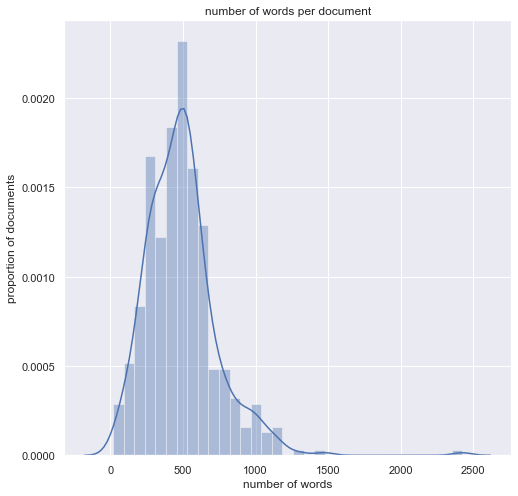

In [24]:
import seaborn as sns
sns.set()

num_words = [len(s.split()) for s in jobs['text']]

plt.figure(figsize=(8,8))
sns.distplot(num_words)
plt.title('number of words per document')
plt.xlabel('number of words')
plt.ylabel('proportion of documents')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [27]:
##### Your Code Here #####
from sklearn.feature_extraction.text import TfidfVectorizer

# instantiate vectorizer

tfidf = TfidfVectorizer(stop_words = 'english',
                       ngram_range = (1,2),
                       min_df = 3,
                       max_df = 0.6)
                       #max_features = 5000)
    
# create a vocabulary and tf-idf score per document

dtm = tfidf.fit_transform(jobs['text'])

# get feature names to use as dataframe column headers

dtm = pd.DataFrame(dtm.todense(), columns = tfidf.get_feature_names())

print(dtm.shape)
dtm.head()

#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

(426, 12301)


,000,000 employees,000 year,04,10,10 time,10 years,100,100 000,100 companies,...,years relevant,years requirements,years technical,years work,years working,yes,york,york city,york offices,yrs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [28]:
##### Your Code Here #####
from sklearn.neighbors import NearestNeighbors

# fit on DTM

nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')

nn.fit(dtm)

# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [29]:
nn.kneighbors([dtm.iloc[1].values])

(array([[0.        , 1.30017503, 1.30468716, 1.31140198, 1.31406612]]),
 array([[  1,  59, 222, 234, 201]], dtype=int64))

In [30]:
jobs['text'][1][:150]

"b' Job Description   As a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services to help our clients nav"

In [31]:
indeed_job_post = ["""
We envision a Luminex solution in every lab around the world seeking to obtain timely and confident answers. We aim to lead with transformative solutions that uniquely accelerate reliable answers while reducing the overall cost of advancing health.

We are seeking a Machine Learning Software Engineer to develop and deploy sophisticated machine learning image classification algorithms for a novel multi-spectral cell imaging platform within our Flow Cytometry team. We are seeking a highly motivated and talented individual who will be comfortable in a fast-paced development environment and will be a key contributor to the software, algorithms and application development engineering team.

At Luminex, we place a high priority on developing innovative solutions for cell analysis applications using novel technologies. As a Machine Learning Software Engineer, you will work with our small team of algorithm and software engineers on cutting-edge technology products with focus on Amnis high speed imaging flow cytometers and associated statistical data analysis software that rapidly processes large volumes of cellular imagery to identify populations of interest. Working closely with our biology and instrumentation engineering teams, you will help design and implement robust, creative and impactful solutions using advanced image analysis methods to support instrument operation and a variety of biological applications such as blood cell morphology analysis for disease detection, sperm cell morphology analysis for infertility studies, toxicity detection for drug development and algae analysis for biofuels. In particular, you will play a key role in the development of advanced image classification modules that leverage machine learning and deep learning classification algorithms and adapt them to our customer needs.

Key Responsibilities & Duties:

    Contribute key features and help architect the next-generation imaging flow cytometry analysis software powered by Artificial Intelligence.
    Design, implement and deploy algorithmic solutions to advance our data analysis tool offerings including complex shape and texture analysis, statistical classification and clustering with special emphasis on machine learning and deep learning classification algorithms.
    Employ software libraries, tools and best practices to implement efficient, scalable, and reusable software solutions.
    Communicate and collaborate effectively with our interdisciplinary R&D teams to research and solve complex problems to facilitate new product development and improve existing products.

Education & Experience:

    M.S. in Electrical Engineering, Computer Science, Mathematics or related field with a strong foundation in statistical image classification and high dimensional data analysis methods and experience in their practice. Expertise in machine learning techniques, especially deep learning, for image classification required.
    5+ years of professional experience developing, implementing and testing complex algorithms in production environments.
    Fluency in Python, R or C++ and experience working with machine learning platforms such as TensorFlow/Keras required.
    Experience in GPU programming and/or cloud computing a bonus.
    Open and responsive to new ideas with the ability to develop creative and practical solutions to difficult problems.
    Strong organizational skills, flexibility to changing priorities and needs, attention to detail, and multi-tasking ability.
    Proficient in oral and written technical communication.
    Excellent interpersonal communication skills with a high degree of comfort working with cross-functional teams.

Work Conditions:

    Must work onsite at the Luminex office
    Some travel may be required, limited to 10%.

Luminex Corporation is an Equal Opportunity/Affirmative Action Employer. All qualified applicants will receive consideration for employment without regard to race, color, religion, sex, age, national origin, disability status of an otherwise qualified individual, citizenship status, membership or application for membership in a uniformed service, or any other protected characteristic or category protected by applicable law.
"""]

In [33]:
# query of similar document to the one posted above

q = tfidf.transform(indeed_job_post)
q

<1x12301 sparse matrix of type '<class 'numpy.float64'>'
	with 341 stored elements in Compressed Sparse Row format>

In [34]:
nn.kneighbors(q.todense())

(array([[1.2733347 , 1.29240259, 1.29252293, 1.29352957, 1.30099272]]),
 array([[201, 309, 307, 255, 106]], dtype=int64))

In [35]:
jobs['text'][201]

"b' Internship Overview Data Science Internships Portland, OR or Seattle, WA These twelve-week internships are scheduled to begin in May June 2019  Responsibilities & Requirements Cambia Health Solutions is working to create a seamless and frictionless health care experience for consumers nationwide. This presents a unique challenge and opportunity for innovative and disruptive solutions from our Artificial Intelligence team.  Our Data Scientists design, develop, and implement data-driven solutions using machine learning technologies and advanced statistical analyses. You should be passionate about finding insights in data, comfortable with large and fragmented data sets, and command a variety of analytic tools at your disposal.  Internship opportunities are available on the following teams: Natural Language Processing, Deep Learning, Product Development and Clinical Analytics.  Natural Language Processing in Seattle, WA Our NLP team is looking for a passionate, talented and inventive 

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 